In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [2]:
CLR_MAP = {
    0: (0, 0, 0),  # black, wall
    1: (255, 255, 255),  # white, space/path
    2: (237, 28, 36),  # red, src
    3: (237, 28, 36),  # red, dest
    4: (255, 201, 14),  # blue violet, room
    5: (34, 177, 76),  # orange, route
    6: (255, 105, 180),  # hot pink, alternate main route
}

# initialize map
map_height = 100
map_width = map_height

# * height is y, width is x
# * so map_np[y,x]
# * origin point is at top left
init_map_np = np.zeros((map_height, map_width), dtype=np.uint8)

# border wall
# top
init_map_np[0, :] = 1
# bottom
init_map_np[map_height - 1, :] = 1
# left
init_map_np[:, 0] = 1
# right
init_map_np[:, map_width - 1] = 1

In [16]:
# map generation
map_np = init_map_np.copy()
rng = np.random.default_rng(12345)

partition_size = 7

for bound_y in range(1, map_height - 1, partition_size):
    for bound_x in range(1, map_width - 1, partition_size):
        partition_np = map_np[bound_y:bound_y+partition_size, bound_x:bound_x+partition_size]
        partition_np[1:6, 1] = 1
        partition_np[1:6, 5] = 1
        partition_np[1, 1:6] = 1
        partition_np[5, 1:6] = 1

In [41]:
# map generation
map_np = init_map_np.copy()
rng = np.random.default_rng(12345)

partition_size = 7
threshold = 5

for bound_y in range(1, map_height - 1, partition_size):
    for bound_x in range(1, map_width - 1, partition_size):
        partition_np = map_np[bound_y:bound_y+partition_size, bound_x:bound_x+partition_size]
        skip_idx = rng.integers(4)

        if skip_idx != 0:
            partition_np[1:partition_size - 1, 1] = 1
        
        if skip_idx != 1:
            partition_np[1:partition_size - 1, partition_size - 2] = 1
        
        if skip_idx != 2:
            partition_np[1, 1:partition_size - 1] = 1
        
        if skip_idx != 3:
            partition_np[partition_size - 2, 1:partition_size - 1] = 1 

# fill spawn area
map_np[1:partition_size * 2, 1: partition_size * 2] = 0

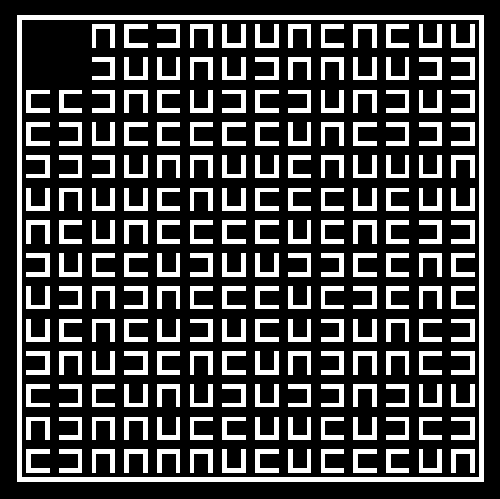

In [42]:
# convert to RGB Map
color_map_np = np.zeros((map_np.shape[0], map_np.shape[1], 3), dtype=np.uint8)

for y in range(map_np.shape[0]):
    for x in range(map_np.shape[1]):
        color = CLR_MAP[map_np[y, x]]
        color_map_np[y, x] = np.array(color)

plt.figure(facecolor='black')
plt.tight_layout()
plt.axis("off")   # turns off axes
plt.axis("tight")  # gets rid of white border
plt.axis("image")  # square up the image instead of filling the "figure" space
plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.xlim([-2, map_width + 1])
plt.ylim([map_height + 1, -2])
plt.imshow(color_map_np, interpolation='nearest')
# plt.gcf().set_dpi(300)
# plt.savefig("test.png",bbox_inches='tight')
plt.show()

In [9]:
# output map
# Writing to file
with open("../map/u_map.txt", "w") as file:
    # Writing data to a file
    for y in range(map_np.shape[0]):
        # print(''.join(map(str,map_np[y, :].tolist())))
        file.write(''.join(map(str,map_np[y, :].tolist()))+'\n')


In [10]:
with open("../map/u_map.txt") as f:
    lines = f.readlines()
# check height & width
map_height = len(lines)
map_width = len(lines[0].strip())
map_repr = [ [0]*map_width for _ in range(map_height) ]
print(f"map_height: {map_height}")
print(f"map_width: {map_width }")

for y in range(len(lines)):
    line = lines[y].strip()
    for x in range(len(line)):
        map_repr[y][x] = int(line[x])

# print(map_repr)


map_height: 100
map_width: 100
